Sales Summary:
   product  total_qty  revenue
0   Apple         17     20.4
1  Banana         15      7.5
2  Orange         11      8.8


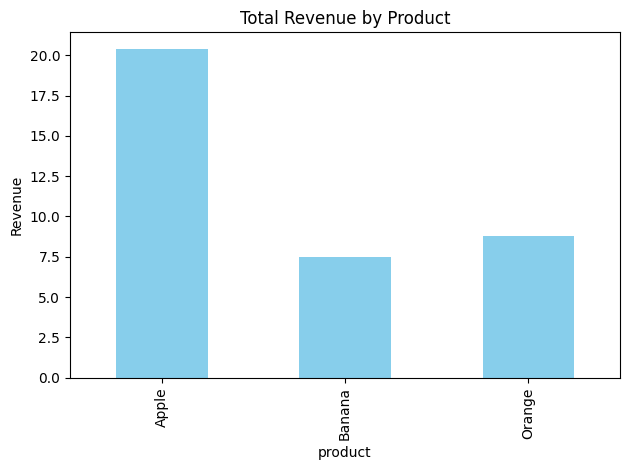

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to SQLite database (will create if it doesn't exist)
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Step 2: Create table and insert some sample data
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

# Sample data (product, quantity, price)
sample_data = [
    ('Apple', 10, 1.2),
    ('Banana', 5, 0.5),
    ('Orange', 8, 0.8),
    ('Apple', 7, 1.2),
    ('Banana', 10, 0.5),
    ('Orange', 3, 0.8),
]

# Insert data
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

# Step 3: Run SQL query to get total quantity and revenue
query = '''
SELECT
    product,
    SUM(quantity) AS total_qty,
    ROUND(SUM(quantity * price), 2) AS revenue
FROM sales
GROUP BY product
'''
df = pd.read_sql_query(query, conn)

# Step 4: Print the results
print("Sales Summary:\n", df)

# Step 5: Plot the revenue per product
df.plot(kind='bar', x='product', y='revenue', color='skyblue', legend=False)
plt.title('Total Revenue by Product')
plt.ylabel('Revenue')
plt.tight_layout()
plt.savefig("sales_chart.png")  # Optional: Save chart as PNG
plt.show()

# Close connection
conn.close()
